<a href="https://colab.research.google.com/github/MaksAndr/Project-4-Group-4/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
import math
import tensorflow as tf
from sklearn.model_selection import train_test_split
# import hvplot.pandas
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [88]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [89]:
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [90]:
# Dropping  columns
df = df.drop(axis='columns',columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [91]:
# Understanding the Data
data_descriptive = df.describe()
data_descriptive

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [92]:

fig = ex.pie(df,names='Attrition_Flag',hole=0.55)
#, color = 'Attrition_Flag', color_discrete_map={'Existing customer': 'red','Attrited customer': '#0da8e7'}
fig.update_layout(title='Existing vs Attrited Customers')
fig.update_traces(textinfo='percent + value')
fig.update_layout(legend=dict(
     orientation="h",
    yanchor="bottom",
    y=-0.1,
    xanchor="center",
    x=0.5
))

fig.show()

In [93]:

fig = ex.pie(df,names='Gender',hole=0.55)
fig.update_layout(title='Distribution Of Gender')
fig.update_traces(textinfo='percent + value')
fig.update_layout(legend=dict(
     orientation="h",
    yanchor="bottom",
    y=-0.1,
    xanchor="center",
    x=0.5
))

fig.show()

In [94]:

fig = ex.pie(df,names='Education_Level',hole=0.55)
fig.update_layout(title='Distribution Of Education Levels')
#fig.update_traces(textinfo='percent + value')
fig.update_layout(legend=dict(
     orientation="h",
    yanchor="bottom",
    y=-0.1,
    xanchor="center",
    x=0.5
))

fig.show()

In [95]:
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [96]:
fig = ex.pie(df,names='Income_Category',hole=0.55)
fig.update_layout(title='Income Category')
fig.update_traces(textinfo='percent + value')
fig.update_layout(legend=dict(
     orientation="h",
    yanchor="bottom",
    y=-0.1,
    xanchor="center",
    x=0.5
))

fig.show()

In [97]:

fig = ex.histogram(df, x='Customer_Age',nbins=10, color_discrete_sequence = ['#09729d'], template='simple_white', width=1000, height=600)
fig.update_layout(title='Distribution Of Age')
fig.show()

In [98]:
df.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [99]:
fig = ex.pie(df,names='Card_Category',hole=0.55)
fig.update_layout(title='Income Category')
fig.update_traces(textinfo='percent + value')
fig.update_layout(legend=dict(
     orientation="h",
    yanchor="bottom",
    y=-0.1,
    xanchor="center",
    x=0.5
))

fig.show()

In [100]:
att_count = df['Income_Category'].value_counts()
att_count

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [101]:

# Code adapted from: https://www.kaggle.com/code/eltiganihamad/bank-customer-churn-classification 
def visualize_distribution(column):
    # Initialise the subplot function using number of rows and columns
    fig, ax = plt.subplots(2, tight_layout=True)
    fig.suptitle(column)
    ax[0].boxplot(df[column], vert=False)
    ax[1].hist(df[column], bins=round(math.sqrt(len(df[column]))))
    fig.tight_layout()
    

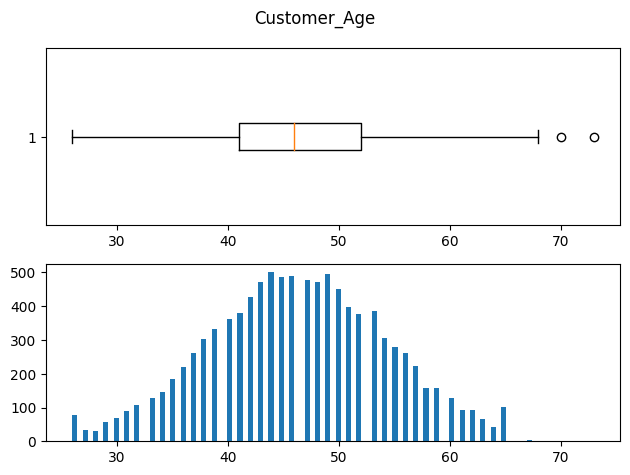

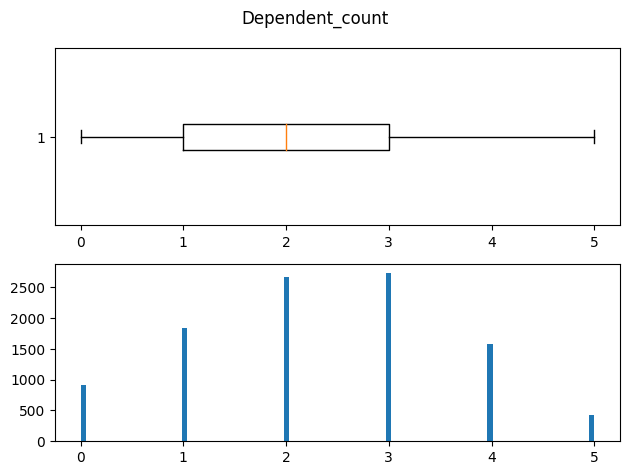

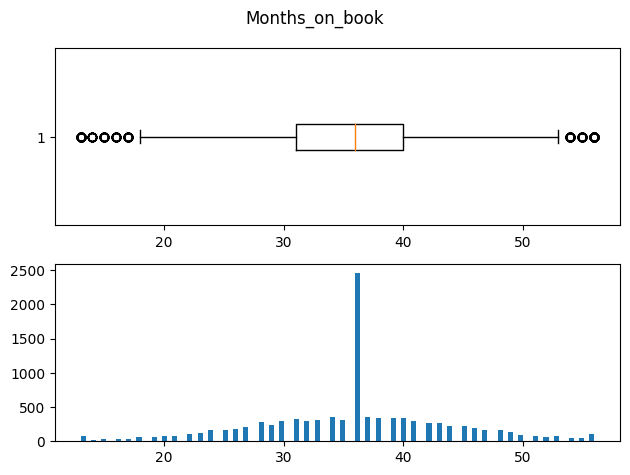

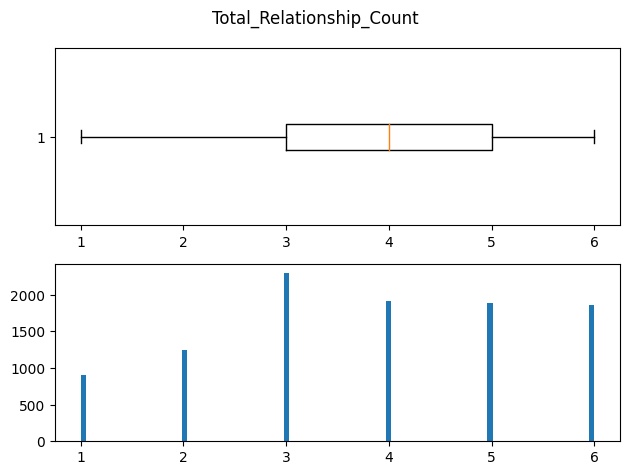

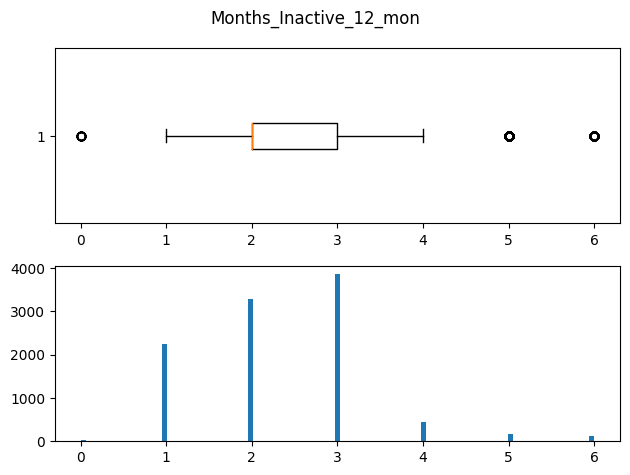

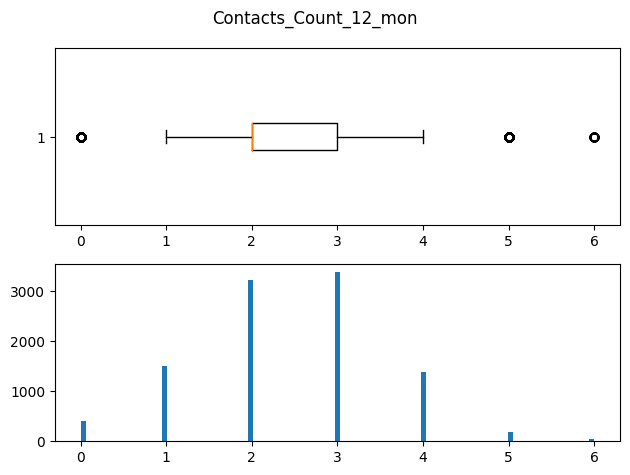

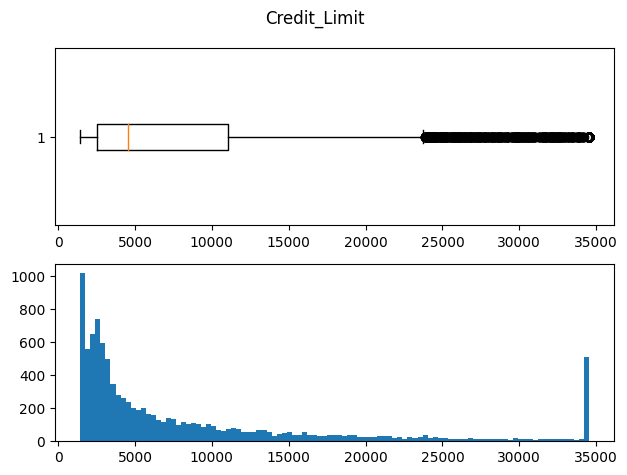

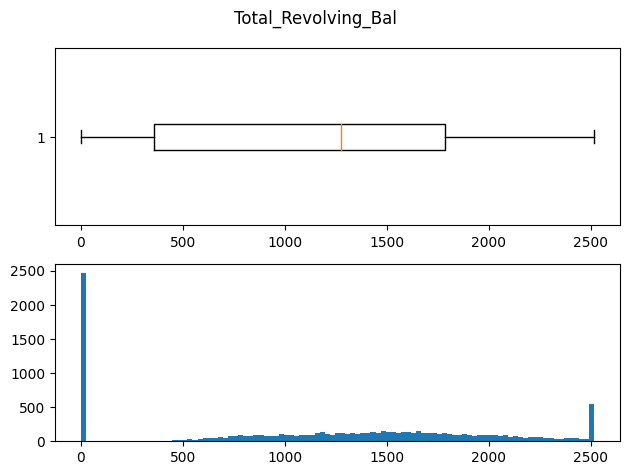

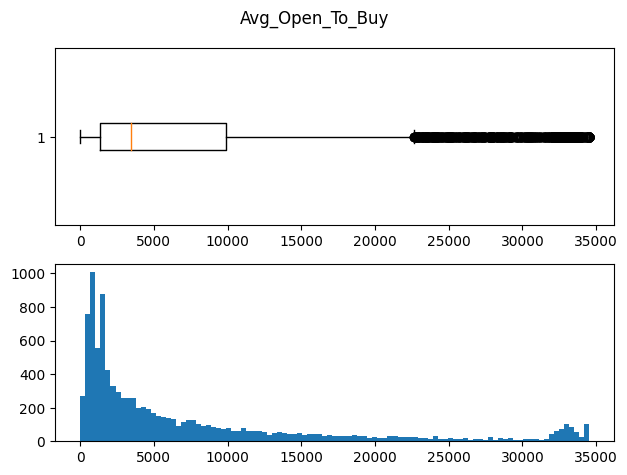

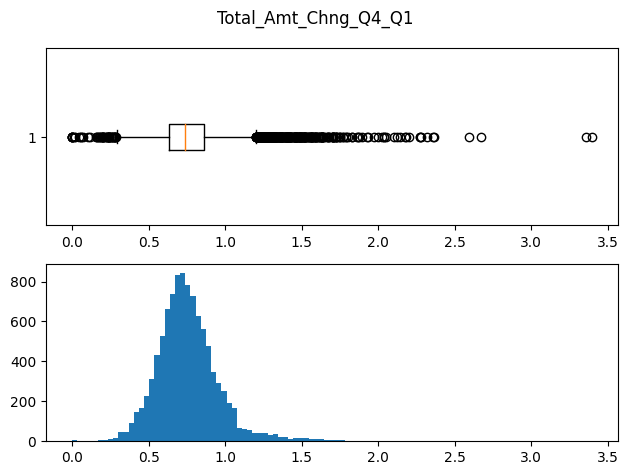

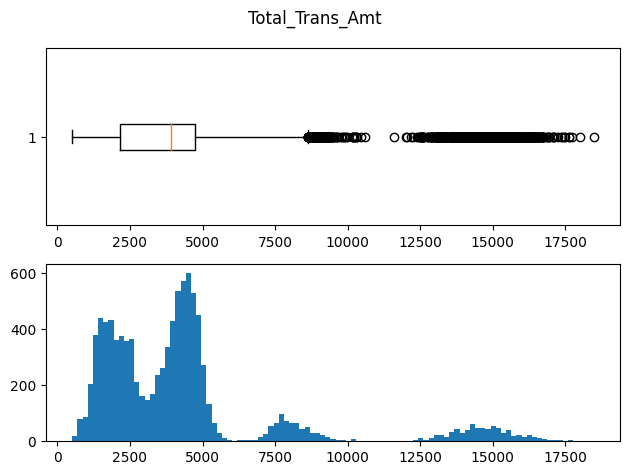

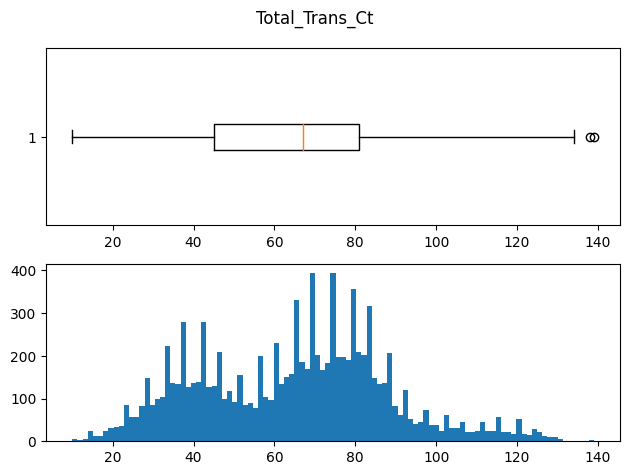

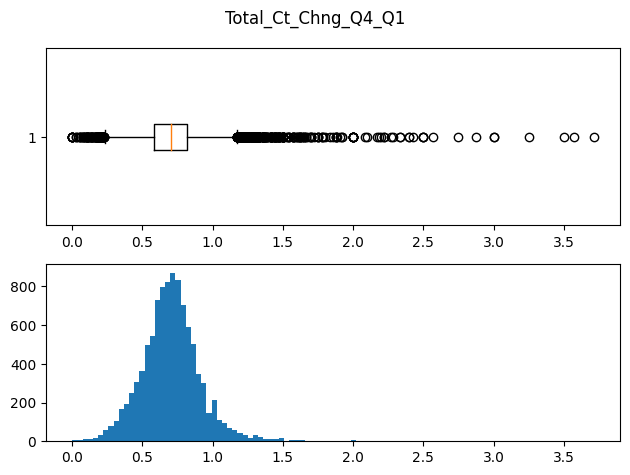

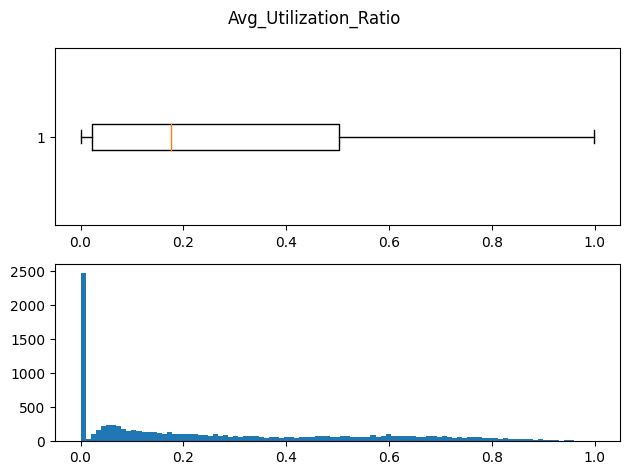

In [102]:
# Code adapted from: https://www.kaggle.com/code/eltiganihamad/bank-customer-churn-classification 
columns = data_descriptive.columns.values.tolist()

columns.remove('CLIENTNUM')

for x in columns:
    visualize_distribution(x)

In [103]:
# Scaling the numeric columns
data_scaled = StandardScaler().fit_transform(df[["Customer_Age", "Months_on_book","Credit_Limit","Total_Revolving_Bal", "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio" ]])

In [104]:
# Creating a DataFrame with with the scaled data
df_transformed = pd.DataFrame(data_scaled, columns=["Customer_Age", "Months_on_book","Credit_Limit","Total_Revolving_Bal", "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"])

In [105]:
# Display sample data
df_transformed.head()

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.384621,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,1.010715,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.008965,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,-0.241473,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,-1.869317,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [106]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [107]:
# Transform the columns using get_dummies()
df_dummies = pd.get_dummies(df[["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]],  )
# Display sample data
df_categorical = df_dummies.replace(True,1).replace(False,0)

In [108]:
df_categorical

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10123,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
10124,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
10125,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [109]:
# df_flag = df.Attrition_Flag.replace('Attrited Customer',1).replace('Existing Customer',0)

df=df.replace(to_replace='Existing Customer', value=0)
df=df.replace(to_replace='Attrited Customer', value=1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [110]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['Attrition_Flag']

# Separate the X variable, the features
X = df.drop(columns = 'Attrition_Flag')

In [111]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [112]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [113]:
# # Transform the Attrition_Flag column using get_dummies()
# flag_dummies = pd.get_dummies(df["Attrition_Flag"])

# y = flag_dummies.replace(True,1).replace(False,0)
# # Display sample data
# y.head()

In [114]:
df_transformed.head()

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.384621,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,1.010715,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.008965,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,-0.241473,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,-1.869317,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [115]:
df_categorical.head()

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [116]:
# Concatenate the df_shopping_transformed and the card_dummies DataFrames
X= pd.concat([df_transformed, df_categorical], axis=1)

# Display sample data
X.head()

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,0.384621,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,...,0,0,1,0,0,0,1,0,0,0
1,0.333570,1.010715,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,...,0,0,0,0,1,0,1,0,0,0
2,0.583058,0.008965,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,...,0,0,0,1,0,0,1,0,0,0
3,-0.789126,-0.241473,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,...,0,0,0,0,1,0,1,0,0,0
4,-0.789126,-1.869317,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,...,0,0,1,0,0,0,1,0,0,0


In [117]:
# df_cleaned.to_csv('Project_4_Cleaned.csv')
 

 Split our data into training and testing

In [118]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [119]:
X

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,0.384621,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,...,0,0,1,0,0,0,1,0,0,0
1,0.333570,1.010715,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,...,0,0,0,0,1,0,1,0,0,0
2,0.583058,0.008965,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,...,0,0,0,1,0,0,1,0,0,0
3,-0.789126,-0.241473,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,...,0,0,0,0,1,0,1,0,0,0
4,-0.789126,-1.869317,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,0.509840,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714,...,0,1,0,0,0,0,1,0,0,0
10123,-0.664382,-1.368442,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458,...,0,1,0,0,0,0,1,0,0,0
10124,-0.290150,0.008965,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155,...,0,0,0,0,1,0,1,0,0,0
10125,-2.036565,0.008965,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155,...,0,1,0,0,0,0,1,0,0,0


In [120]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

Create a Logistic Regression Model

In [121]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

 ## Fit (train) or model using the training data

In [122]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

 ## Make predictions

In [123]:
# Predict outcomes for test data set
predictions = model.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
6498,0,0
9013,0,0
2053,0,0
3211,0,0
5559,1,1
...,...,...
7502,0,0
6390,0,0
2347,0,0
5340,0,0


## Calculate the Accuracy Score

In [124]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.8846761453396524

In [125]:
# Generate a confusion matrix for the model
conf_mtrx = confusion_matrix(y_test, predictions)
print(conf_mtrx)

[[2043   84]
 [ 208  197]]


In [126]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2127
           1       0.70      0.49      0.57       405

    accuracy                           0.88      2532
   macro avg       0.80      0.72      0.75      2532
weighted avg       0.87      0.88      0.88      2532



Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [127]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [128]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [129]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [130]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [131]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

 Making Predictions Using the Random Forest Model



In [132]:
# Making predictions using the testing data
predictions_rf= rf_model.predict(X_test_scaled)

## Model Evaluation

In [133]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions_rf)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_rf)

In [136]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions_rf))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2088,39
Actual 1,117,288


Accuracy Score : 0.9383886255924171
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2127
           1       0.88      0.71      0.79       405

    accuracy                           0.94      2532
   macro avg       0.91      0.85      0.88      2532
weighted avg       0.94      0.94      0.94      2532



In [137]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.19093944872959479, 'Total_Trans_Amt'),
 (0.1723655880342526, 'Total_Trans_Ct'),
 (0.12007935908675207, 'Total_Ct_Chng_Q4_Q1'),
 (0.10756844648525253, 'Total_Revolving_Bal'),
 (0.07481071395659109, 'Total_Amt_Chng_Q4_Q1'),
 (0.07348473805150793, 'Avg_Utilization_Ratio'),
 (0.04642364200169695, 'Credit_Limit'),
 (0.0446688124731844, 'Avg_Open_To_Buy'),
 (0.042353450258288385, 'Customer_Age'),
 (0.033955761461921, 'Months_on_book')]

In [138]:
# Code adapted from: https://www.kaggle.com/code/andreshg/churn-prediction-0-99-auc-h2o-sklearn-smote#4.-Feature-Selection
def plot_importances(model, model_name, features_to_plot, feature_names):
    #fit model and performances
    model.fit(X,y)
    importances = rf_model.feature_importances_
    
    # sort and rank importances
    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    values = importances[indices][-features_to_plot:]
    
    # plot a graph
    y_ticks = np.arange(0, features_to_plot)
    fig, ax = plt.subplots()
    ax.barh(y_ticks, values, color = '#19598D')
    ax.set_yticklabels(best_features)
    ax.set_yticks(y_ticks)
    ax.set_title("%s Feature Importance"%(model_name))
    fig.tight_layout()
    plt.show()
    
def best_features(model, features_to_plot, feature_names):
    # get list of best features 
    rf_model.fit(X,y)
    importances = rf_model.feature_importances_

    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    return best_features

<ipython-input-138-e6430c98c326>:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



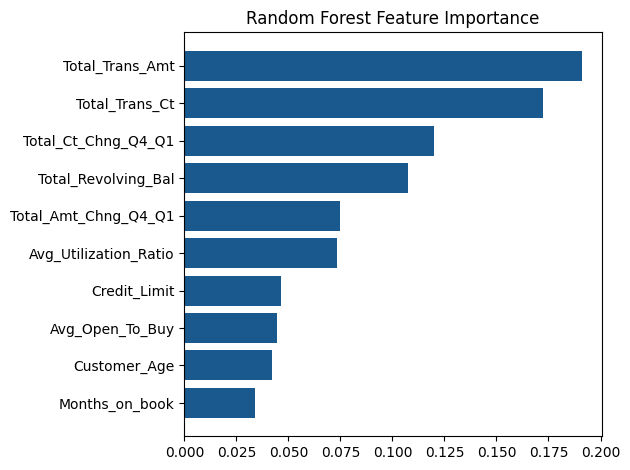

In [139]:
# Code adapted from: https://www.kaggle.com/code/andreshg/churn-prediction-0-99-auc-h2o-sklearn-smote#4.-Feature-Selection
feature_names = list(X.columns)

model1 = RandomForestClassifier(random_state = 1234)
plot_importances(model1, 'Random Forest', 10, feature_names)


Use the RandomOverSampler module from the imbalanced-learn library to resample the data.

In [140]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ro_model = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_resample, y_resample =  ro_model.fit_resample(X_train, y_train)

In [141]:
y_resample.value_counts()

0    6373
1    6373
Name: Attrition_Flag, dtype: int64

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, random_state=42, stratify=y_resample)

In [143]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model_ro = LogisticRegression( max_iter=1000 , random_state = 1)

# Fit the model using the resampled training data
model_ro.fit(X_train, y_train)

# Make a prediction using the testing data
prediction_ro = model_ro.predict(X_test)

In [144]:
# Print the balanced_accuracy score of the model 
acc_score_ro = balanced_accuracy_score(y_test, prediction_ro)
print(acc_score_ro)

0.8289950308005303


In [145]:
# Generate a confusion matrix for the model
conf_mtrx_ro = confusion_matrix(y_test, prediction_ro)
print(conf_mtrx_ro)

[[1310  284]
 [ 261 1332]]


In [146]:
# Print the classification report for the model
print(classification_report(y_test, prediction_ro))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1594
           1       0.82      0.84      0.83      1593

    accuracy                           0.83      3187
   macro avg       0.83      0.83      0.83      3187
weighted avg       0.83      0.83      0.83      3187



In [147]:
# Instantiate the Random Forest model
# Assign a random_state parameter of 1 to the model
model_ro_rf = RandomForestClassifier(random_state = 1)

# Fit the model using the resampled training data
model_ro_rf.fit(X_train, y_train)

# Make a prediction using the testing data
prediction_ro_rf = model_ro_rf.predict(X_test)



In [148]:
# Print the balanced_accuracy score of the model 
acc_score_ro_rf = balanced_accuracy_score(y_test, prediction_ro_rf)
print(acc_score_ro_rf)

0.9852562300087979


In [149]:
# Generate a confusion matrix for the model
conf_mtrx_ro_rf = confusion_matrix(y_test, prediction_ro_rf)
print(conf_mtrx_ro_rf)

[[1552   42]
 [   5 1588]]


In [150]:
# Print the (Random Forest)classification report for the model
print(classification_report(y_test, prediction_ro_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1594
           1       0.97      1.00      0.99      1593

    accuracy                           0.99      3187
   macro avg       0.99      0.99      0.99      3187
weighted avg       0.99      0.99      0.99      3187



In [151]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=33))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [152]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [153]:
# Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
299/299 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.7205
Epoch 2/100
299/299 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8403
Epoch 3/100
299/299 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8776
Epoch 4/100
299/299 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8898
Epoch 5/100
299/299 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.8959
Epoch 6/100
299/299 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9011
Epoch 7/100
299/299 [==============================] - 0s 1ms/step - loss: 0.2459 - accuracy: 0.9012
Epoch 8/100
299/299 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.9064
Epoch 9/100
299/299 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.9049
Epoch 10/100
299/299 [==============================] - 0s 1ms/step - loss: 0.2294 - accura

In [154]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

100/100 - 0s - loss: 0.1711 - accuracy: 0.9382 - 164ms/epoch - 2ms/step
Loss: 0.1711476892232895, Accuracy: 0.9381864070892334


In [155]:
y_predict=nn_model.predict(X_test)
y_test

100/100 [==============================] - 0s 801us/step


7596     1
8667     1
2759     0
4284     0
4281     0
        ..
7049     0
7963     1
6722     1
11510    1
6093     0
Name: Attrition_Flag, Length: 3187, dtype: int64